# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

Customarily, we import as follows:


# 10分钟入门pandas

这是一个对 pandas 简短的介绍，主要面向新用户。你可以在 Cookbook 中查看更详细的内容。 

通常，我们要像下面一样导入一些包：

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Object Creation

See the `Data Structure Intro` section.

Creating a `Series` by passing a list of values, letting pandas create a default integer index:

## 创建对象

参见 `Data Structure Intro` 一节。

用一个包含值的序列创建一个 `Series`，pandas会创建一个默认的 整形 索引：

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a `DataFrame` by passing a NumPy array, with a datetime index and labeled columns:

通过传递 NumPy array, datetime index, 以及 labeled columns, 来创建一个 `DataFrame`：

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

A         B         C         D
2013-01-01 -0.785911 -0.925077  0.149331 -0.385128
2013-01-02 -1.057271  1.062239 -0.062109 -0.951021
2013-01-03  2.360007  0.500823 -0.197806 -1.726745
2013-01-04 -0.062657 -0.729563 -0.636554  1.020592
2013-01-05 -0.544627  0.003628  0.028986  0.421330
2013-01-06  0.221945 -0.627945 -0.815481  0.107807

Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.

用 dict 创建一个 `DataFrame`, dict 中的 objects 能转换成类似 series 的数据。

In [10]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [11]:
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

> **注意** 所有列的 series 长度（行数）必须一样，上面例子中的长度（行数）= 4

> dict 的 key 为列名，value 需要是 `pd.Timestamp` `pd.Series` `np.array` `pd.Categorical` 等类型

The columns of the resulting `DataFrame` have different dtypes.

产出的 `DataFrame` 的各 columns 会有不同的 dtypes。

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

> 注意 dtypes 是 `DataFrame` 的一个属性

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

如果你使用的是 IPython，使用 Tab 自动补全功能会自动识别所有的属性以及自定义的列，下图中是所有能够被自动识别的属性的一个子集：

```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D
```

As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` is there as well; the rest of the attributes have been truncated for brevity.

就像你所见到的列 `A`, `B`, `C` 和 `D` 的自动补全都可以由 tab 完成。列 `E` 也是一样的；剩下的属性为了简短起见都省略了。

## Viewing Data

See the `Basics section`.

Here is how to view the top and bottom rows of the frame:

## 查看数据

详情请参阅 `Basics section`。

查看 DataFrame 头部和尾部的行：

In [13]:
df.head()

A         B         C         D
2013-01-01 -0.785911 -0.925077  0.149331 -0.385128
2013-01-02 -1.057271  1.062239 -0.062109 -0.951021
2013-01-03  2.360007  0.500823 -0.197806 -1.726745
2013-01-04 -0.062657 -0.729563 -0.636554  1.020592
2013-01-05 -0.544627  0.003628  0.028986  0.421330

In [14]:
df.tail(3)

A         B         C         D
2013-01-04 -0.062657 -0.729563 -0.636554  1.020592
2013-01-05 -0.544627  0.003628  0.028986  0.421330
2013-01-06  0.221945 -0.627945 -0.815481  0.107807

Display the index, columns, and the underlying NumPy data:

显示 index, columns 和底层的 NumPy 数据：

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.78591144, -0.92507661,  0.14933065, -0.38512787],
       [-1.05727111,  1.06223934, -0.06210878, -0.95102092],
       [ 2.36000699,  0.50082259, -0.1978058 , -1.72674516],
       [-0.06265706, -0.72956272, -0.63655351,  1.02059231],
       [-0.54462723,  0.00362831,  0.02898646,  0.42132996],
       [ 0.22194495, -0.62794542, -0.81548083,  0.10780697]])

> 可见 index 是 rows 数据行的标题； columns 是 columns 数据列的标题； values 则是 NumPy 矩阵

`describe()` shows a quick statistic summary of your data:

`describe()`函数对于数据的快速统计汇总：

In [18]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.021914 -0.119316 -0.255605 -0.252194
std    1.237096  0.784362  0.385831  0.988287
min   -1.057271 -0.925077 -0.815481 -1.726745
25%   -0.725590 -0.704158 -0.526867 -0.809548
50%   -0.303642 -0.312159 -0.129957 -0.138660
75%    0.150794  0.376524  0.006213  0.342949
max    2.360007  1.062239  0.149331  1.020592

Transposing your data:

转置数据：

In [19]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.785911   -1.057271    2.360007   -0.062657   -0.544627    0.221945
B   -0.925077    1.062239    0.500823   -0.729563    0.003628   -0.627945
C    0.149331   -0.062109   -0.197806   -0.636554    0.028986   -0.815481
D   -0.385128   -0.951021   -1.726745    1.020592    0.421330    0.107807

> 发现 `df.T == df.transpose()`

Sorting by an axis:

按轴进行排序：

In [20]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01 -0.385128  0.149331 -0.925077 -0.785911
2013-01-02 -0.951021 -0.062109  1.062239 -1.057271
2013-01-03 -1.726745 -0.197806  0.500823  2.360007
2013-01-04  1.020592 -0.636554 -0.729563 -0.062657
2013-01-05  0.421330  0.028986  0.003628 -0.544627
2013-01-06  0.107807 -0.815481 -0.627945  0.221945

> `df.sort_index` 有2个功能，当axis=0时 对index排序， 当axis=1时 对columns排序

Sorting by values:

按值进行排序：

In [21]:
df.sort_values(by='B')

A         B         C         D
2013-01-01 -0.785911 -0.925077  0.149331 -0.385128
2013-01-04 -0.062657 -0.729563 -0.636554  1.020592
2013-01-06  0.221945 -0.627945 -0.815481  0.107807
2013-01-05 -0.544627  0.003628  0.028986  0.421330
2013-01-03  2.360007  0.500823 -0.197806 -1.726745
2013-01-02 -1.057271  1.062239 -0.062109 -0.951021

## Selection

<div class="alert alert-info">
Note: 
</div>

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, `.at`, `.iat`, `.loc` and `.iloc`.

See the indexing documentation `Indexing and Selecting Data` and `MultiIndex / Advanced Indexing`.

## 数据选取

<div class="alert alert-info">
注意: 
</div>

虽然标准的 Python / Numpy 的选择和设置表达式都能够直接派上用场，但是作为产品使用的代码，我们推荐使用经过优化的 pandas 数据访问方式： `.at`, `.iat`, `.loc`, `.iloc`。

详情请参阅 `索引和选取数据` 和 `多重索引 / 高级索引`。

> `.ix` 弃用了

### Getting

Selecting a single column, which yields a `Series`, equivalent to `df.A`:

### 获取

选择一个单独的 column，将会返回一个 `Series` ，等同于 `df.A`：

In [22]:
df['A']

2013-01-01   -0.785911
2013-01-02   -1.057271
2013-01-03    2.360007
2013-01-04   -0.062657
2013-01-05   -0.544627
2013-01-06    0.221945
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

通过 [] 选择，对 rows 进行切片选取。

In [23]:
df[0:3]  # 选取范围是[)，前闭合，后开

A         B         C         D
2013-01-01 -0.785911 -0.925077  0.149331 -0.385128
2013-01-02 -1.057271  1.062239 -0.062109 -0.951021
2013-01-03  2.360007  0.500823 -0.197806 -1.726745

In [24]:
df['20130102':'20130104']  # 选取范围是[], 前闭合，后闭合

A         B         C         D
2013-01-02 -1.057271  1.062239 -0.062109 -0.951021
2013-01-03  2.360007  0.500823 -0.197806 -1.726745
2013-01-04 -0.062657 -0.729563 -0.636554  1.020592

In [25]:
# []内必须是一个范围，而不能仅仅是一个值。否则报错

# df[1]  # 报错

# df['20130102'] # 报错
# df[dates[0]] # 报错

> 时间序列 跟中国人的思维一样 'yyyymmdd'

### Selection by Label

See more in `Selection by Label`.

For getting a cross section using a label:

### 通过 label 选择

详情请参阅 `通过标签选择`。

用 label 来获取一个 交叉选区：

In [26]:
df.loc[dates[0]]

A   -0.785911
B   -0.925077
C    0.149331
D   -0.385128
Name: 2013-01-01 00:00:00, dtype: float64

> Series的label就是index。DataFrame的label包括index和columns。

> 通过 label 选取比使用整形下标选取直观的多。方法很简单，调用.loc[], .loc[]内可以是一个label值，也可以是一个label取值范围。注意切片范围是前后闭合。

Selecting on a multi-axis by label:

用 label 对多个 axis 进行选取：

In [27]:
df.loc[:,['A','B']]

A         B
2013-01-01 -0.785911 -0.925077
2013-01-02 -1.057271  1.062239
2013-01-03  2.360007  0.500823
2013-01-04 -0.062657 -0.729563
2013-01-05 -0.544627  0.003628
2013-01-06  0.221945 -0.627945

> 注意 切片范围是[] 前闭合 后闭合  因为用的是 str 标签

> : 冒号 需要进一步了解

Showing label slicing, both endpoints are included:

用 label 进行切片选择，注意切片范围是前闭合，后闭合：

In [28]:
df.loc['20130102':'20130104',['A','B']]

A         B
2013-01-02 -1.057271  1.062239
2013-01-03  2.360007  0.500823
2013-01-04 -0.062657 -0.729563

> 这下了解到冒号的作用，是占位符   `df.loc['row':'rown', ['column1', 'column2']]`

In [29]:
# df.loc[] 内的值只能是label，如果传入整数下标，报错
# df.loc[0:3, ['A','B']]

Reduction in the dimensions of the returned object:

对返回的对象进行降维：

In [30]:
df.loc['20130102',['A','B']]

A   -1.057271
B    1.062239
Name: 2013-01-02 00:00:00, dtype: float64

In [31]:
type(df.loc['20130102',['A','B']])

pandas.core.series.Series

> 从 `DataFrame` 变成了 `Series`

For getting a scalar value:

获取标量值 scalar value：

In [32]:
df.loc[dates[0],'A']

-0.7859114388710933

> 定位到 1 x 1 的 cell 级别，返回 scalar value

For getting fast access to a scalar (equivalent to the prior method):

快速获取一个标量（与上面的方法等价）：

In [33]:
df.at[dates[0],'A']

-0.7859114388710933

### Selection by Position

See more in `Selection by Position`.

Select via the position of the passed integers:

### 通过下标选取

详情请参阅 `通过下标选取`。

通过传递 int 数值进行下标选取：

In [34]:
df.iloc[3]

A   -0.062657
B   -0.729563
C   -0.636554
D    1.020592
Name: 2013-01-04 00:00:00, dtype: float64

> 可以发现 默认选取的是 行 row

> 下标(position), 是编程语言中的重要概念。

> pandas 的数据结构也支持用下标进行检索。比如把 `DataFrame` 看做一个二维数组，用下标进行检索。

> 用下标进行选取/检索的方法是调用 `df.iloc[]`

> `df.iloc[]` 内可以是一个整形下标值，也可以是一个下标取值范围（切片），甚至可以是一个 `list`。注意，如果传入切片范围，范围是前闭合，后开的。

By integer slices, acting similar to numpy/python:

传入 int 整型的下标切片，与 python/numpy 形式相同：

In [35]:
df.iloc[3:5,0:2]  # 注意 这里 columns 也是前闭后开

A         B
2013-01-04 -0.062657 -0.729563
2013-01-05 -0.544627  0.003628

By lists of integer position locations, similar to the numpy/python style:

传入包含 int 整型的 lists，与 python/numpy 形式相同：

In [36]:
df.iloc[[1,2,4],[0,2]]  # 这样就可以跳着选取了

A         C
2013-01-02 -1.057271 -0.062109
2013-01-03  2.360007 -0.197806
2013-01-05 -0.544627  0.028986

For slicing rows explicitly:

只对行进行切片：

In [37]:
df.iloc[1:3,:]  # 列部分 用 : 占位

A         B         C         D
2013-01-02 -1.057271  1.062239 -0.062109 -0.951021
2013-01-03  2.360007  0.500823 -0.197806 -1.726745

For slicing columns explicitly:

只对列进行切片：

In [38]:
df.iloc[:,1:3]  # 行部分 用 : 占位

B         C
2013-01-01 -0.925077  0.149331
2013-01-02  1.062239 -0.062109
2013-01-03  0.500823 -0.197806
2013-01-04 -0.729563 -0.636554
2013-01-05  0.003628  0.028986
2013-01-06 -0.627945 -0.815481

For getting a value explicitly:

只获取某个值：

In [39]:
df.iloc[1,1]

1.0622393406462385

For getting fast access to a scalar (equivalent to the prior method):

快速获取某个值（与上面的方法等价）：

In [40]:
df.iat[1,1]  # 总结: at系列比loc系列 运算更快

1.0622393406462385

### Boolean Indexing

Using a single column’s values to select data.

### 布尔索引


用某列的值来选取数据。

In [41]:
df[df.A > 0]  # 等价操作 df[df['A'] > 0]

A         B         C         D
2013-01-03  2.360007  0.500823 -0.197806 -1.726745
2013-01-06  0.221945 -0.627945 -0.815481  0.107807

Selecting values from a DataFrame where a boolean condition is met.

根据 布尔条件，用 where 从 `DataFrame` 中选取值，

In [42]:
df[df > 0]  # 选取 DataFrame 的所有 cell / scalar, 大于 0 的部分返回， 小于等于 0 的部分 返回 Nan

A         B         C         D
2013-01-01       NaN       NaN  0.149331       NaN
2013-01-02       NaN  1.062239       NaN       NaN
2013-01-03  2.360007  0.500823       NaN       NaN
2013-01-04       NaN       NaN       NaN  1.020592
2013-01-05       NaN  0.003628  0.028986  0.421330
2013-01-06  0.221945       NaN       NaN  0.107807

Using the `isin()` method for filtering:

用 `isin()` 方法过滤数据：

In [43]:
df2 = df.copy()

In [44]:
df2['E'] = ['one', 'one','two','three','four','three']

In [45]:
df2

A         B         C         D      E
2013-01-01 -0.785911 -0.925077  0.149331 -0.385128    one
2013-01-02 -1.057271  1.062239 -0.062109 -0.951021    one
2013-01-03  2.360007  0.500823 -0.197806 -1.726745    two
2013-01-04 -0.062657 -0.729563 -0.636554  1.020592  three
2013-01-05 -0.544627  0.003628  0.028986  0.421330   four
2013-01-06  0.221945 -0.627945 -0.815481  0.107807  three

In [46]:
df2[df2['E'].isin(['two','four'])]  # 传入列表来过滤 便利!

A         B         C         D     E
2013-01-03  2.360007  0.500823 -0.197806 -1.726745   two
2013-01-05 -0.544627  0.003628  0.028986  0.421330  four

### Setting

Setting a new column automatically aligns the data by the indexes.

### 赋值

为 DataFrame 增加新的一列 (通常是 Series)，通过 index 来自动对齐数据。

In [47]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))  # 有趣的 pd.date_range()
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [48]:
df['F'] = s1  # 这时 已经添加了新的 F列
df  # 观察 df 展示 F列

A         B         C         D    F
2013-01-01 -0.785911 -0.925077  0.149331 -0.385128  NaN
2013-01-02 -1.057271  1.062239 -0.062109 -0.951021  1.0
2013-01-03  2.360007  0.500823 -0.197806 -1.726745  2.0
2013-01-04 -0.062657 -0.729563 -0.636554  1.020592  3.0
2013-01-05 -0.544627  0.003628  0.028986  0.421330  4.0
2013-01-06  0.221945 -0.627945 -0.815481  0.107807  5.0

Setting values by label:

通过 label 赋值：

In [49]:
df.at[dates[0],'A'] = 0  # 对 df 产生影响

Setting values by position:

通过下标赋值：

In [50]:
df.iat[0,1] = 0

Setting by assigning with a NumPy array:

通过传递一个 NumPy array 赋值：

In [51]:
df.loc[:,'D'] = np.array([5] * len(df))  # 看来 * len(df) 是常用操作

The result of the prior setting operations.

上述操作结果。

In [52]:
df  # 可见 A0 B0 都赋值为 0.000000 ， D列赋值为 5 * 5， 新增 F列 float类型

A         B         C  D    F
2013-01-01  0.000000  0.000000  0.149331  5  NaN
2013-01-02 -1.057271  1.062239 -0.062109  5  1.0
2013-01-03  2.360007  0.500823 -0.197806  5  2.0
2013-01-04 -0.062657 -0.729563 -0.636554  5  3.0
2013-01-05 -0.544627  0.003628  0.028986  5  4.0
2013-01-06  0.221945 -0.627945 -0.815481  5  5.0

A `where` operation with setting.

通过 `where` 操作赋值。

In [53]:
df2 = df.copy()
df2[df2 > 0] = -df2  # 大于0的所有 cell 全体取负
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.149331 -5  NaN
2013-01-02 -1.057271 -1.062239 -0.062109 -5 -1.0
2013-01-03 -2.360007 -0.500823 -0.197806 -5 -2.0
2013-01-04 -0.062657 -0.729563 -0.636554 -5 -3.0
2013-01-05 -0.544627 -0.003628 -0.028986 -5 -4.0
2013-01-06 -0.221945 -0.627945 -0.815481 -5 -5.0

## Missing Data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the `Missing Data section`.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

## 缺失值

pandas 主要采用 `np.nan` 代表缺失值，缺失值默认不会参与运算。详情请参阅 `缺失值`。

`reindex()` 允许修改、增加、删除指定轴上的index。该方法返回数据的一个副本。

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1  # 制造出 3个 Nan

A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.149331  5  NaN  1.0
2013-01-02 -1.057271  1.062239 -0.062109  5  1.0  1.0
2013-01-03  2.360007  0.500823 -0.197806  5  2.0  NaN
2013-01-04 -0.062657 -0.729563 -0.636554  5  3.0  NaN

To drop any rows that have missing data.

剔除所有包含缺失值的行。

In [55]:
df1.dropna(how='any')  # row 0, 2, 3 全部被干掉, 用什么方式? 需要 know how

A         B         C  D    F    E
2013-01-02 -1.057271  1.062239 -0.062109  5  1.0  1.0

Filling missing data.

填充缺失值。

In [56]:
df1.fillna(value=5)  # 传参 value=? 填充

A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.149331  5  5.0  1.0
2013-01-02 -1.057271  1.062239 -0.062109  5  1.0  1.0
2013-01-03  2.360007  0.500823 -0.197806  5  2.0  5.0
2013-01-04 -0.062657 -0.729563 -0.636554  5  3.0  5.0

To get the boolean mask where values are `nan`.

获取值是否为 `nan` 的布尔标记。 (布尔填充)

In [57]:
pd.isna(df1)

A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True

## Operations

See the `Basic section on Binary Ops`.

## 运算

详情请参阅 `Basic section on Binary Ops`。

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:

### 统计

运算过程中，缺失值不参与计算。

得到描述性统计。

In [58]:
df  # 回顾 df 的样子

A         B         C  D    F
2013-01-01  0.000000  0.000000  0.149331  5  NaN
2013-01-02 -1.057271  1.062239 -0.062109  5  1.0
2013-01-03  2.360007  0.500823 -0.197806  5  2.0
2013-01-04 -0.062657 -0.729563 -0.636554  5  3.0
2013-01-05 -0.544627  0.003628  0.028986  5  4.0
2013-01-06  0.221945 -0.627945 -0.815481  5  5.0

In [59]:
df.mean()  # 默认 axis=0 数据向下方压缩，返回 len(columns) 的一个 Series

A    0.152899
B    0.034864
C   -0.255605
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

对另一个轴 axis=1 进行同样的运算：

In [60]:
df.mean(1)  # 等价于 显式 df.mean(axis=1)

2013-01-01    1.287333
2013-01-02    1.188572
2013-01-03    1.932605
2013-01-04    1.314245
2013-01-05    1.697598
2013-01-06    1.755704
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

对于拥有不同维度的对象进行运算时需要对齐 alignment。除此之外，pandas 会自动沿着指定维度广播。

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)  # 变更 .shift(int) 看看是怎样下移的
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [62]:
df.sub(s, axis='index')  # df.sub() 作减法运算，由于缺失值缘故，row 0, 1, 5 全部被广播成 NaN 馕

A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03  1.360007 -0.499177 -1.197806  4.0  1.0
2013-01-04 -3.062657 -3.729563 -3.636554  2.0  0.0
2013-01-05 -5.544627 -4.996372 -4.971014  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN

### Apply

Applying functions to the data:

### Apply 函数

这是一个高阶函数，它的参数也是函数，类似于 `map()`, 把参数函数作用在数据上。默认作用在一列数据上。

对数据应用函数：

In [63]:
df.apply(np.cumsum)  # apply上 np.cumsum() 累加函数

A         B         C   D     F
2013-01-01  0.000000  0.000000  0.149331   5   NaN
2013-01-02 -1.057271  1.062239  0.087222  10   1.0
2013-01-03  1.302736  1.563062 -0.110584  15   3.0
2013-01-04  1.240079  0.833499 -0.747137  20   6.0
2013-01-05  0.695452  0.837128 -0.718151  25  10.0
2013-01-06  0.917397  0.209182 -1.533632  30  15.0

In [64]:
df.apply(lambda x: x.max() - x.min())

A    3.417278
B    1.791802
C    0.964811
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at `Histogramming and Discretization`.

### 频数统计

详情请参阅 `Histogramming and Discretization`。

In [65]:
s = pd.Series(np.random.randint(0, 7, size=10))
s  # 左边是 index 右边是 randint 产生的随机整数

0    2
1    5
2    1
3    2
4    1
5    5
6    0
7    4
8    4
9    0
dtype: int32

In [66]:
s.value_counts()  # 统计结果 降序排列 左边是随机整数 右边是频次

5    2
4    2
2    2
1    2
0    2
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses `regular expressions` by default (and in some cases always uses them). See more at `Vectorized String Methods`.

### 字符串方法

对于 Series 对象，它的 str 属性包含一系列的字符串处理方法，就如同下段代码一样，能很方便的对 array 中各个元素进行运算。值得注意的是，在 str 属性中的模式匹配默认使用`正则表达式`。更多详情请参考 `字符串向量化方法`。

In [67]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()  # 直接能访问 str 属性， 高级!

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

## 聚合

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the `Merging section`.

Concatenating pandas objects together with `concat()`:

### Concat

pandas 中提供了大量的方法能够轻松对 Series，DataFrame 和 Panel 对象进行多种逻辑关系的合并操作。

具体请参阅 `合并`。

通过 `pd.concat()`来连接 pandas 对象：

In [68]:
df = pd.DataFrame(np.random.randn(10, 4))
df

0         1         2         3
0 -2.124870 -0.667304 -0.845505  0.836029
1 -2.538904  0.016954  0.067801  0.196931
2  0.494095  1.515555 -0.776315  0.950336
3 -0.975834 -0.902869 -1.483007  0.166271
4  1.123349  0.162256 -0.352119  0.663801
5  2.266198  0.722491 -0.269570  0.237189
6 -1.294564 -0.464133 -1.140077 -0.704306
7  0.288089 -0.286655 -0.027690 -0.090043
8 -0.277232  1.198492 -0.792513 -0.086278
9 -0.155626 -0.016949 -0.990596 -0.150227

In [69]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [70]:
pieces

[          0         1         2         3
 0 -2.124870 -0.667304 -0.845505  0.836029
 1 -2.538904  0.016954  0.067801  0.196931
 2  0.494095  1.515555 -0.776315  0.950336,
           0         1         2         3
 3 -0.975834 -0.902869 -1.483007  0.166271
 4  1.123349  0.162256 -0.352119  0.663801
 5  2.266198  0.722491 -0.269570  0.237189
 6 -1.294564 -0.464133 -1.140077 -0.704306,
           0         1         2         3
 7  0.288089 -0.286655 -0.027690 -0.090043
 8 -0.277232  1.198492 -0.792513 -0.086278
 9 -0.155626 -0.016949 -0.990596 -0.150227]

In [71]:
pd.concat(pieces)

0         1         2         3
0 -2.124870 -0.667304 -0.845505  0.836029
1 -2.538904  0.016954  0.067801  0.196931
2  0.494095  1.515555 -0.776315  0.950336
3 -0.975834 -0.902869 -1.483007  0.166271
4  1.123349  0.162256 -0.352119  0.663801
5  2.266198  0.722491 -0.269570  0.237189
6 -1.294564 -0.464133 -1.140077 -0.704306
7  0.288089 -0.286655 -0.027690 -0.090043
8 -0.277232  1.198492 -0.792513 -0.086278
9 -0.155626 -0.016949 -0.990596 -0.150227

### Join

SQL style merges. See the `Database style joining` section.

### Join

类似于SQL中的合并。具体请参阅 `Database style joining`。

In [72]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [73]:
left

key  lval
0  foo     1
1  foo     2

In [74]:
right

key  rval
0  foo     4
1  foo     5

In [75]:
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

Another example that can be given is:

`pd.merge()` 的另一个例子：

In [76]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [77]:
left

key  lval
0  foo     1
1  bar     2

In [78]:
right

key  rval
0  foo     4
1  bar     5

In [79]:
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  bar     2     5

### Append

Append rows to a dataframe. See the `Appending` section.

### Append

将若干行追加到某个 dataframe。具体请参阅 `Appending`。

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

A         B         C         D
0 -0.536904 -1.356983 -1.351376  0.411000
1  0.297906  0.694949  0.641105  1.135082
2  0.326626  0.619033 -0.725996 -0.133138
3  2.137913 -0.088811 -0.705146  0.199270
4 -0.084993  0.269836 -0.872676  1.324170
5 -0.952213 -0.834758 -1.217554 -1.197734
6  1.849167 -1.396529  0.567020 -0.506703
7 -1.474628  1.275820 -0.733458 -0.550435

In [81]:
s = df.iloc[3]
s

A    2.137913
B   -0.088811
C   -0.705146
D    0.199270
Name: 3, dtype: float64

In [82]:
df.append(s, ignore_index=True)  # s 被 append 到 row 8

A         B         C         D
0 -0.536904 -1.356983 -1.351376  0.411000
1  0.297906  0.694949  0.641105  1.135082
2  0.326626  0.619033 -0.725996 -0.133138
3  2.137913 -0.088811 -0.705146  0.199270
4 -0.084993  0.269836 -0.872676  1.324170
5 -0.952213 -0.834758 -1.217554 -1.197734
6  1.849167 -1.396529  0.567020 -0.506703
7 -1.474628  1.275820 -0.733458 -0.550435
8  2.137913 -0.088811 -0.705146  0.199270

## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

See the `Grouping` section.

## 分组

group by 操作过程如下:

- **分割** -- 基于某些标准 将数据划分为不同的组
- **应用** -- 对每组数据 分别应用某个函数
- **组合** -- 将结果 组合到一个新的数据结构

具体请参阅 `Grouping`。

In [83]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

A      B         C         D
0  foo    one  0.062857 -0.777250
1  bar    one  1.252907 -0.776094
2  foo    two  1.594533  1.674108
3  bar  three -1.407471 -0.322655
4  foo    two  0.556310 -0.658664
5  bar    two -0.375666  0.516704
6  foo    one -1.407433  1.281172
7  foo  three -0.638815  0.365051

Grouping and then applying the `sum()` function to the resulting groups.

分组，并对每个组数据应用 `sum()` 函数。

In [84]:
df.groupby('A')  # 返回一个不可描述的 GroupBy 对象

In [85]:
df.groupby('A').sum()  # 传入列名 'A'

C         D
A                      
bar -0.530229 -0.582045
foo  0.167452  1.884418

Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum` function.

按多个 column 分组形成层级 index，然后应用 `sum` 函数。

In [86]:
df.groupby(['A','B']).sum()  # 其实就是传入 >1 个列名

C         D
A   B                        
bar one    1.252907 -0.776094
    three -1.407471 -0.322655
    two   -0.375666  0.516704
foo one   -1.344575  0.503922
    three -0.638815  0.365051
    two    2.150843  1.015444

## Reshaping

See the sections on `Hierarchical Indexing and Reshaping`.

## 重塑

具体请参阅 `Hierarchical Indexing and Reshaping`。

### Stack

In [87]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [88]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.302663  0.776491
      two     2.571830  0.336441
baz   one     1.098082  0.042512
      two    -0.752949 -0.028079
foo   one     0.050109  0.449867
      two     0.639367  0.211036
qux   one     0.083336 -0.512634
      two    -0.509277  1.413335

In [89]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.302663  0.776491
      two     2.571830  0.336441
baz   one     1.098082  0.042512
      two    -0.752949 -0.028079

The `stack()` method “compresses” a level in the DataFrame’s columns.

`stack()` 方法对 DataFrame 的 columns “压缩”一个层级。

In [90]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.302663
               B    0.776491
       two     A    2.571830
               B    0.336441
baz    one     A    1.098082
               B    0.042512
       two     A   -0.752949
               B   -0.028079
dtype: float64

In [91]:
type(stacked)  # 变成 Series 类型了

pandas.core.series.Series

With a “stacked” DataFrame or Series (having a `MultiIndex` as the `index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the last level:

对于一个 “stacked” DataFrame 或者Series（拥有 `MultiIndex` 作为`索引`），`stack()`的逆操作是`unstack()`，默认 unstack 到上一个层级：

In [92]:
stacked.unstack()  # 还原

A         B
first second                    
bar   one    -0.302663  0.776491
      two     2.571830  0.336441
baz   one     1.098082  0.042512
      two    -0.752949 -0.028079

In [93]:
type(stacked.unstack())  # 变回 DataFrame

pandas.core.frame.DataFrame

In [94]:
stacked.unstack(1)  # 请观察 index 与 columns

second        one       two
first                      
bar   A -0.302663  2.571830
      B  0.776491  0.336441
baz   A  1.098082 -0.752949
      B  0.042512 -0.028079

In [95]:
stacked.unstack(0) # 传入参数 level=0 请观察 index 与 columns

first          bar       baz
second                      
one    A -0.302663  1.098082
       B  0.776491  0.042512
two    A  2.571830 -0.752949
       B  0.336441 -0.028079

## Pivot Tables

See the section on `Pivot Tables`.

## 数据透视表

请参阅 `Pivot Tables`。

In [96]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

df

A  B    C         D         E
0     one  A  foo -1.052711  0.004762
1     one  B  foo -0.549365 -0.923561
2     two  C  foo  0.124398 -0.896354
3   three  A  bar -0.770631  0.337796
4     one  B  bar  1.039345 -1.366796
5     one  C  bar  1.422404 -0.990564
6     two  A  foo -0.639830  0.580805
7   three  B  foo  2.317856  0.870396
8     one  C  foo -0.007501  0.859182
9     one  A  bar -1.241148 -0.011407
10    two  B  bar -0.563563  0.315839
11  three  C  bar -0.597572 -0.165681

We can produce pivot tables from this data very easily:

可以从这个数据中轻松的生成数据透视表：

In [97]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
# 玩法跟 excel 一样，分别传入 数据源, 求值项, 行, 列
# 应该可以分别对行和列 求 grandtotal

C             bar       foo
A     B                    
one   A -1.241148 -1.052711
      B  1.039345 -0.549365
      C  1.422404 -0.007501
three A -0.770631       NaN
      B       NaN  2.317856
      C -0.597572       NaN
two   A       NaN -0.639830
      B -0.563563       NaN
      C       NaN  0.124398

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the `Time Series section`.

## 时间序列

pandas 在对频率转换进行重新采样时拥有简单、强大且高效的功能（如将按秒采样的数据转换为按5分钟为单位进行采样的数据）。这种操作在金融领域非常常见。具体参考 `时间序列`。

In [98]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')  # 周期100秒 freq='S'秒, freq='M/D' 试一试?
rng  # 观察这个对象

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [99]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    314
2012-01-01 00:00:01    158
2012-01-01 00:00:02     79
2012-01-01 00:00:03    479
2012-01-01 00:00:04     22
2012-01-01 00:00:05    178
2012-01-01 00:00:06    155
2012-01-01 00:00:07    424
2012-01-01 00:00:08    172
2012-01-01 00:00:09    208
2012-01-01 00:00:10    377
2012-01-01 00:00:11    199
2012-01-01 00:00:12    155
2012-01-01 00:00:13    256
2012-01-01 00:00:14    125
2012-01-01 00:00:15    462
2012-01-01 00:00:16    256
2012-01-01 00:00:17     74
2012-01-01 00:00:18    323
2012-01-01 00:00:19    492
2012-01-01 00:00:20    249
2012-01-01 00:00:21    385
2012-01-01 00:00:22    395
2012-01-01 00:00:23    185
2012-01-01 00:00:24    412
2012-01-01 00:00:25     77
2012-01-01 00:00:26     88
2012-01-01 00:00:27    284
2012-01-01 00:00:28     58
2012-01-01 00:00:29     42
                      ... 
2012-01-01 00:01:10    196
2012-01-01 00:01:11    187
2012-01-01 00:01:12    303
2012-01-01 00:01:13     97
2012-01-01 00:01:14     18
2012-01-01 00:01:15    319
2

In [100]:
ts.resample('5Min')  # ts=TimeSeries  参数居然可以 '5Min'

DatetimeIndexResampler [freq=<5 * Minutes>, axis=0, closed=left, label=left, convention=start, base=0]

In [101]:
ts.resample('5Min').sum()  # 这里会提示 Freq: 5T

2012-01-01    23270
Freq: 5T, dtype: int32

Time zone representation:

时区表示：

In [102]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')  # 思考 periods 和 range() 的关系
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.614848
2012-03-07   -1.168937
2012-03-08   -0.254673
2012-03-09    0.565227
2012-03-10   -0.402686
Freq: D, dtype: float64

In [103]:
ts_utc = ts.tz_localize('UTC')  # 默认是按 UTC 时区计算? Linux特色
ts_utc

2012-03-06 00:00:00+00:00   -0.614848
2012-03-07 00:00:00+00:00   -1.168937
2012-03-08 00:00:00+00:00   -0.254673
2012-03-09 00:00:00+00:00    0.565227
2012-03-10 00:00:00+00:00   -0.402686
Freq: D, dtype: float64

Converting to another time zone:

时区转换：

In [104]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.614848
2012-03-06 19:00:00-05:00   -1.168937
2012-03-07 19:00:00-05:00   -0.254673
2012-03-08 19:00:00-05:00    0.565227
2012-03-09 19:00:00-05:00   -0.402686
Freq: D, dtype: float64

Converting between time span representations:

时间跨度转换：

In [105]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.254608
2012-02-29   -0.906911
2012-03-31    1.662381
2012-04-30    0.375885
2012-05-31   -0.813849
Freq: M, dtype: float64

In [106]:
ps = ts.to_period()  # 这个常用!
ps  # Period Series

2012-01    0.254608
2012-02   -0.906911
2012-03    1.662381
2012-04    0.375885
2012-05   -0.813849
Freq: M, dtype: float64

In [107]:
ps.to_timestamp()  # 注意日期 和 前前项 输出的区别

2012-01-01    0.254608
2012-02-01   -0.906911
2012-03-01    1.662381
2012-04-01    0.375885
2012-05-01   -0.813849
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

日期与时间戳之间的转换使得可以使用一些方便的算术函数。例如，我们把以11月为年底的季度数据转换为当前季度末月底为始的数据：

In [108]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')  # pd.period_range 参数 '开始' '结束' 闭合
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [109]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    0.100958
1990Q2   -0.463030
1990Q3    0.701915
1990Q4    0.232931
1991Q1   -0.702456
1991Q2    0.266242
1991Q3    0.478614
1991Q4    0.794052
1992Q1   -0.217027
1992Q2    0.403991
1992Q3    0.523636
1992Q4   -1.154834
1993Q1   -0.509075
1993Q2   -1.122438
1993Q3   -0.422333
1993Q4   -1.752630
1994Q1    1.180912
1994Q2    2.134615
1994Q3   -0.059035
1994Q4   -2.545327
1995Q1   -0.499182
1995Q2   -0.909253
1995Q3    0.847673
1995Q4   -1.247765
1996Q1    0.019724
1996Q2    1.519746
1996Q3   -0.568083
1996Q4   -1.095983
1997Q1   -0.265402
1997Q2    0.926500
1997Q3   -0.039791
1997Q4    0.267826
1998Q1   -1.446869
1998Q2    0.455375
1998Q3    1.367670
1998Q4    0.131399
1999Q1   -2.233057
1999Q2    0.776317
1999Q3   -1.857399
1999Q4    0.198158
2000Q1    0.819869
2000Q2    0.568085
2000Q3   -0.574041
2000Q4    0.763765
Freq: Q-NOV, dtype: float64

In [110]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9  # 帅 链式操作
ts.head()

1990-03-01 09:00    0.100958
1990-06-01 09:00   -0.463030
1990-09-01 09:00    0.701915
1990-12-01 09:00    0.232931
1991-03-01 09:00   -0.702456
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the `categorical introduction` and the `API documentation`.

## Categoricals

pandas 在 DataFrame 中支持 Categorical 类型的数据，详细文档请参阅 `Categorical 简介` 和 `API documentation`。

In [111]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e

Convert the raw grades to a categorical data type.

把 raw_grade 转换为 categorical 数据类型：

In [112]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [113]:
df.dtypes

id              int64
raw_grade      object
grade        category
dtype: object

Rename the categories to more meaningful names (assigning to `Series.cat.categories` is inplace!).

将 Categorical 类型数据重命名为更有意义的名称。

In [114]:
df["grade"].cat.categories = ["very good", "good", "very bad"]  # 对应 'a', 'b', 'e'

Reorder the categories and simultaneously add the missing categories (methods under `Series .cat` return a new `Series` by default).

对分类重新排序，同时添加缺失的分类。

In [115]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

排序是按照分类的顺序进行的，而不是字典顺序。

In [116]:
df.sort_values(by="grade")  # 即时返回 但不对原 df 产生影响

id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

Grouping by a categorical column also shows empty categories.

按 cat列 分组时，也会显示空的 cat。

In [117]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the `Plotting` docs.

## 绘图

具体文档参看 `绘图`文档。

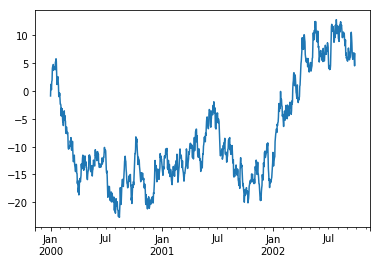

In [118]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On a DataFrame, the `plot()` method is a convenience to plot all of the columns with labels:

DataFrame 对象的 `plot()` 方法是一种将所有 columns 及其 labels 进行绘制的简便方法：

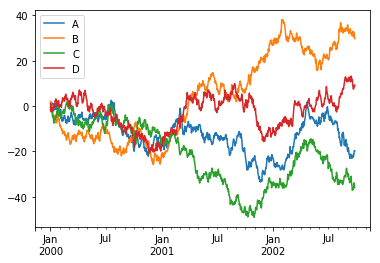

In [119]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

## 导入/保存数据

### CSV

Writing to a csv file.

保存至 csv 文件。

In [120]:
df.to_csv('foo.csv')  # 这个 就是上面 ABCD 彩色线条的数据

Reading from a csv file.

从 csv 文件读入。

In [121]:
pd.read_csv('foo.csv')  # 再读回来

Unnamed: 0          A          B          C          D
0    2000-01-01  -1.569565   1.692784  -0.731018   0.976334
1    2000-01-02  -1.570222   2.039045  -0.470422   0.490767
2    2000-01-03  -1.326049   1.574799   0.659932  -2.070956
3    2000-01-04  -0.430933   0.673283  -0.718008  -2.693410
4    2000-01-05   1.267366  -0.606378  -1.809560  -0.973901
5    2000-01-06   1.410309   0.378168  -1.736906  -0.635990
6    2000-01-07   1.063955  -0.249390  -3.303310  -2.149295
7    2000-01-08   0.749640  -0.824711  -4.808750  -1.439153
8    2000-01-09  -0.305568  -3.560119  -4.485635  -1.499385
9    2000-01-10  -0.291896  -3.844390  -4.291241  -2.246683
10   2000-01-11   1.010146  -5.227914  -5.734773  -1.098664
11   2000-01-12   0.594363  -4.763372  -7.440869  -0.442272
12   2000-01-13   0.101520  -4.239143  -7.587024   0.126457
13   2000-01-14  -0.691209  -5.403163  -6.258413  -0.328221
14   2000-01-15  -1.713638  -4.934699  -5.558897  -0.008130
15   2000-01-16  -1.440509  -4.748344  -5.893616   1.963839
16   2000-01-17  -0.687537  -4.066844  -5.848671   2.376987
17   2000-01-18   0.988282  -4.588268  -4.628411   2.089569
18   2000-01-19   1.136245  -7.190619  -4.374627   3.105585
19   2000-01-20  -0.250905  -7.548528  -5.191091   2.114682
20   2000-01-21   0.846190  -7.467840  -3.979988   2.523566
21   2000-01-22  -1.528344  -6.151695  -2.317588   1.486325
22   2000-01-23  -1.023171  -6.772695  -2.920568   0.375550
23   2000-01-24  -1.316367  -6.138679  -3.810936  -0.204013
24   2000-01-25  -3.512347  -5.054594  -3.639690  -0.033392
25   2000-01-26  -2.726916  -4.517768  -3.997516   1.500501
26   2000-01-27  -3.369007  -5.478559  -3.712712   2.085237
27   2000-01-28  -4.800351  -5.892953  -0.553301   2.321427
28   2000-01-29  -3.092135  -5.693137  -0.396218   0.602648
29   2000-01-30  -3.252322  -6.796151  -1.166992  -0.110208
..          ...        ...        ...        ...        ...
970  2002-08-28 -14.864262  34.339916 -29.846524  11.437057
971  2002-08-29 -15.536490  34.115172 -28.156096  11.208342
972  2002-08-30 -17.138499  33.465209 -27.479899  12.066966
973  2002-08-31 -16.836429  34.055916 -28.957163  10.649277
974  2002-09-01 -18.480727  33.132098 -29.072791  11.430641
975  2002-09-02 -19.802417  35.582168 -29.907418  11.063933
976  2002-09-03 -20.115444  35.719731 -30.450941  11.708789
977  2002-09-04 -18.414175  33.215201 -31.133697  10.822746
978  2002-09-05 -18.482636  33.548138 -29.990331  10.801054
979  2002-09-06 -19.300771  31.963034 -32.162402  12.329937
980  2002-09-07 -21.026407  32.062105 -31.957335  12.006165
981  2002-09-08 -21.595183  33.002305 -32.146517  12.684818
982  2002-09-09 -21.913137  33.417882 -33.876636  11.652775
983  2002-09-10 -23.123297  33.378854 -33.401250  11.903865
984  2002-09-11 -22.316611  34.050652 -32.902073  11.412822
985  2002-09-12 -21.301037  33.796638 -32.374708  10.641433
986  2002-09-13 -21.256651  32.344225 -31.549208  11.813802
987  2002-09-14 -21.590280  31.778354 -31.027144  13.186466
988  2002-09-15 -22.374126  31.620874 -33.540403  12.845359
989  2002-09-16 -23.138346  32.123724 -34.586943  10.977476
990  2002-09-17 -23.027624  30.958315 -35.515606  11.424322
991  2002-09-18 -22.752545  31.290323 -37.220526  11.648612
992  2002-09-19 -22.586304  32.478164 -36.767368   9.637711
993  2002-09-20 -21.683096  32.895583 -36.473679   8.492716
994  2002-09-21 -22.508051  32.041918 -36.408285   7.441095
995  2002-09-22 -22.242167  30.507150 -36.598893   7.468703
996  2002-09-23 -21.310452  32.346956 -35.538188   7.946825
997  2002-09-24 -19.867705  32.149274 -33.945130   8.237416
998  2002-09-25 -19.711321  30.266449 -35.617373   9.247680
999  2002-09-26 -19.743228  29.653964 -35.858318   8.978059

[1000 rows x 5 columns]

### HDF5

Reading and writing to `HDFStores`.

Writing to a HDF5 Store.

`HDFStores` 的读写。

写入一个 HDF5 Store。

In [122]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store.

从一个 HDF5 Store 读入。

In [123]:
pd.read_hdf('foo.h5','df')

A          B          C          D
2000-01-01  -1.569565   1.692784  -0.731018   0.976334
2000-01-02  -1.570222   2.039045  -0.470422   0.490767
2000-01-03  -1.326049   1.574799   0.659932  -2.070956
2000-01-04  -0.430933   0.673283  -0.718008  -2.693410
2000-01-05   1.267366  -0.606378  -1.809560  -0.973901
2000-01-06   1.410309   0.378168  -1.736906  -0.635990
2000-01-07   1.063955  -0.249390  -3.303310  -2.149295
2000-01-08   0.749640  -0.824711  -4.808750  -1.439153
2000-01-09  -0.305568  -3.560119  -4.485635  -1.499385
2000-01-10  -0.291896  -3.844390  -4.291241  -2.246683
2000-01-11   1.010146  -5.227914  -5.734773  -1.098664
2000-01-12   0.594363  -4.763372  -7.440869  -0.442272
2000-01-13   0.101520  -4.239143  -7.587024   0.126457
2000-01-14  -0.691209  -5.403163  -6.258413  -0.328221
2000-01-15  -1.713638  -4.934699  -5.558897  -0.008130
2000-01-16  -1.440509  -4.748344  -5.893616   1.963839
2000-01-17  -0.687537  -4.066844  -5.848671   2.376987
2000-01-18   0.988282  -4.588268  -4.628411   2.089569
2000-01-19   1.136245  -7.190619  -4.374627   3.105585
2000-01-20  -0.250905  -7.548528  -5.191091   2.114682
2000-01-21   0.846190  -7.467840  -3.979988   2.523566
2000-01-22  -1.528344  -6.151695  -2.317588   1.486325
2000-01-23  -1.023171  -6.772695  -2.920568   0.375550
2000-01-24  -1.316367  -6.138679  -3.810936  -0.204013
2000-01-25  -3.512347  -5.054594  -3.639690  -0.033392
2000-01-26  -2.726916  -4.517768  -3.997516   1.500501
2000-01-27  -3.369007  -5.478559  -3.712712   2.085237
2000-01-28  -4.800351  -5.892953  -0.553301   2.321427
2000-01-29  -3.092135  -5.693137  -0.396218   0.602648
2000-01-30  -3.252322  -6.796151  -1.166992  -0.110208
...               ...        ...        ...        ...
2002-08-28 -14.864262  34.339916 -29.846524  11.437057
2002-08-29 -15.536490  34.115172 -28.156096  11.208342
2002-08-30 -17.138499  33.465209 -27.479899  12.066966
2002-08-31 -16.836429  34.055916 -28.957163  10.649277
2002-09-01 -18.480727  33.132098 -29.072791  11.430641
2002-09-02 -19.802417  35.582168 -29.907418  11.063933
2002-09-03 -20.115444  35.719731 -30.450941  11.708789
2002-09-04 -18.414175  33.215201 -31.133697  10.822746
2002-09-05 -18.482636  33.548138 -29.990331  10.801054
2002-09-06 -19.300771  31.963034 -32.162402  12.329937
2002-09-07 -21.026407  32.062105 -31.957335  12.006165
2002-09-08 -21.595183  33.002305 -32.146517  12.684818
2002-09-09 -21.913137  33.417882 -33.876636  11.652775
2002-09-10 -23.123297  33.378854 -33.401250  11.903865
2002-09-11 -22.316611  34.050652 -32.902073  11.412822
2002-09-12 -21.301037  33.796638 -32.374708  10.641433
2002-09-13 -21.256651  32.344225 -31.549208  11.813802
2002-09-14 -21.590280  31.778354 -31.027144  13.186466
2002-09-15 -22.374126  31.620874 -33.540403  12.845359
2002-09-16 -23.138346  32.123724 -34.586943  10.977476
2002-09-17 -23.027624  30.958315 -35.515606  11.424322
2002-09-18 -22.752545  31.290323 -37.220526  11.648612
2002-09-19 -22.586304  32.478164 -36.767368   9.637711
2002-09-20 -21.683096  32.895583 -36.473679   8.492716
2002-09-21 -22.508051  32.041918 -36.408285   7.441095
2002-09-22 -22.242167  30.507150 -36.598893   7.468703
2002-09-23 -21.310452  32.346956 -35.538188   7.946825
2002-09-24 -19.867705  32.149274 -33.945130   8.237416
2002-09-25 -19.711321  30.266449 -35.617373   9.247680
2002-09-26 -19.743228  29.653964 -35.858318   8.978059

[1000 rows x 4 columns]

### Excel

Reading and writing to `MS Excel`.

Writing to an excel file.

`MS Excel` 文件的读写。

写入一个 Excel 文件。

In [124]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file.

从一个 Excel 文件读入。

In [125]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

A          B          C          D
2000-01-01  -1.569565   1.692784  -0.731018   0.976334
2000-01-02  -1.570222   2.039045  -0.470422   0.490767
2000-01-03  -1.326049   1.574799   0.659932  -2.070956
2000-01-04  -0.430933   0.673283  -0.718008  -2.693410
2000-01-05   1.267366  -0.606378  -1.809560  -0.973901
2000-01-06   1.410309   0.378168  -1.736906  -0.635990
2000-01-07   1.063955  -0.249390  -3.303310  -2.149295
2000-01-08   0.749640  -0.824711  -4.808750  -1.439153
2000-01-09  -0.305568  -3.560119  -4.485635  -1.499385
2000-01-10  -0.291896  -3.844390  -4.291241  -2.246683
2000-01-11   1.010146  -5.227914  -5.734773  -1.098664
2000-01-12   0.594363  -4.763372  -7.440869  -0.442272
2000-01-13   0.101520  -4.239143  -7.587024   0.126457
2000-01-14  -0.691209  -5.403163  -6.258413  -0.328221
2000-01-15  -1.713638  -4.934699  -5.558897  -0.008130
2000-01-16  -1.440509  -4.748344  -5.893616   1.963839
2000-01-17  -0.687537  -4.066844  -5.848671   2.376987
2000-01-18   0.988282  -4.588268  -4.628411   2.089569
2000-01-19   1.136245  -7.190619  -4.374627   3.105585
2000-01-20  -0.250905  -7.548528  -5.191091   2.114682
2000-01-21   0.846190  -7.467840  -3.979988   2.523566
2000-01-22  -1.528344  -6.151695  -2.317588   1.486325
2000-01-23  -1.023171  -6.772695  -2.920568   0.375550
2000-01-24  -1.316367  -6.138679  -3.810936  -0.204013
2000-01-25  -3.512347  -5.054594  -3.639690  -0.033392
2000-01-26  -2.726916  -4.517768  -3.997516   1.500501
2000-01-27  -3.369007  -5.478559  -3.712712   2.085237
2000-01-28  -4.800351  -5.892953  -0.553301   2.321427
2000-01-29  -3.092135  -5.693137  -0.396218   0.602648
2000-01-30  -3.252322  -6.796151  -1.166992  -0.110208
...               ...        ...        ...        ...
2002-08-28 -14.864262  34.339916 -29.846524  11.437057
2002-08-29 -15.536490  34.115172 -28.156096  11.208342
2002-08-30 -17.138499  33.465209 -27.479899  12.066966
2002-08-31 -16.836429  34.055916 -28.957163  10.649277
2002-09-01 -18.480727  33.132098 -29.072791  11.430641
2002-09-02 -19.802417  35.582168 -29.907418  11.063933
2002-09-03 -20.115444  35.719731 -30.450941  11.708789
2002-09-04 -18.414175  33.215201 -31.133697  10.822746
2002-09-05 -18.482636  33.548138 -29.990331  10.801054
2002-09-06 -19.300771  31.963034 -32.162402  12.329937
2002-09-07 -21.026407  32.062105 -31.957335  12.006165
2002-09-08 -21.595183  33.002305 -32.146517  12.684818
2002-09-09 -21.913137  33.417882 -33.876636  11.652775
2002-09-10 -23.123297  33.378854 -33.401250  11.903865
2002-09-11 -22.316611  34.050652 -32.902073  11.412822
2002-09-12 -21.301037  33.796638 -32.374708  10.641433
2002-09-13 -21.256651  32.344225 -31.549208  11.813802
2002-09-14 -21.590280  31.778354 -31.027144  13.186466
2002-09-15 -22.374126  31.620874 -33.540403  12.845359
2002-09-16 -23.138346  32.123724 -34.586943  10.977476
2002-09-17 -23.027624  30.958315 -35.515606  11.424322
2002-09-18 -22.752545  31.290323 -37.220526  11.648612
2002-09-19 -22.586304  32.478164 -36.767368   9.637711
2002-09-20 -21.683096  32.895583 -36.473679   8.492716
2002-09-21 -22.508051  32.041918 -36.408285   7.441095
2002-09-22 -22.242167  30.507150 -36.598893   7.468703
2002-09-23 -21.310452  32.346956 -35.538188   7.946825
2002-09-24 -19.867705  32.149274 -33.945130   8.237416
2002-09-25 -19.711321  30.266449 -35.617373   9.247680
2002-09-26 -19.743228  29.653964 -35.858318   8.978059

[1000 rows x 4 columns]

## Gotchas

If you are attempting to perform an operation you might see an exception like:

## 坑

如果你尝试某个操作并且看到如下异常：

In [126]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See `Comparisons` for an explanation and what to do.

See `Gotchas` as well.

解释及处理方式请见 `Comparisons`。

同时请见 `Gotchas`。